# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analyzing the data about patients in Brazil who **show** or **not-show** to their scheduled appointments.
>
> We will explore different **age** groups of people who show up, we will find out if **gender** is related to patient's show up, additionaly we will draw tentative conclusion whether patients who have **diabetes** showing up to the appointment or not.

### Questions

<ul>
<li>How many people show up?</li>
<li>What is the age range of patients who show up?</li>
<li>Does gender affect patients show up?</li>
<li>Is having diabetes a factor for showing up?</li>
</ul>

In [1]:
# Importing all the neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>

## Data Wrangling

> Loading dataset, learning about dimensions, datatypes of the dataset, and looking out for the ouliers or errant data in the dataset. 

In [2]:
# Loading data and printing out a first two lines. 
df_show = pd.read_csv('Database_No_show_appointments.csv')
df_show.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> There are some column names which has typo and will be renamed.

In [3]:
#Inspecting data types
df_show.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
#looking for instances of missing data.
df_show.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#looking for instances of duplicated data.
df_show.duplicated().sum()

0

> We have neither nulls nor duplicated values in our dataset but **PatientId** and **AppointmentID** are unique identifiers and not needed for our analysis therefore they will be removed.   
>
>**No-show** column will be converted from no to show_up and yes to no_show for better interpretation. 

In [6]:
#Looking for outliers and possibly errant data
df_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> There are invalid values and outliers in **age** factor to be cleaned.  

### Removing unwanted values and changing naming conventions

In [7]:
#Deleting unique identifiers
df_show.drop(['PatientId','AppointmentID'], axis=1, inplace = True)

In [8]:
# Getting lid of negative age
df_show = df_show.drop(df_show[df_show.Age<0].index)

In [9]:
#renaming columns, converting to lowercase, and replacing "-" with "_"
df_show.rename(columns = lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df_show.rename(columns = {"hipertension":"hypertension"}, inplace = True)
df_show.rename(columns = {"scheduledday":"scheduled_day"}, inplace = True)
df_show.rename(columns = {"appointmentday":"appointment_day"}, inplace = True)
df_show.rename(columns = {"no_show":"show_value"}, inplace = True)

In [10]:
#checking if some columns are deleted and others renamed to lowecase
df_show.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show_value
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


> Removed PatientId, AppointmentID, and negative age values
>
> Renamed **scheduled_day**, **appointment_day**, **hypertension**, **sms_received**, and **no_show** columns

In [11]:
#Checking if outiliers values are removed
df_show.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>We can confirm that we remain with we only needed columns which are ranamed collectly and no outliers in our dataset.

In [12]:
#Replacing no_show column into show_up and no_show
df_show['show_value']=np.where(df_show['show_value']=='No','show_up','no_show')

In [13]:
#Replacing 0 and 1 values of diabetes column with no and yes  
df_show.diabetes=df_show.diabetes.map({0:'Yes', 1:'No'})

In [14]:
#Confirming changes
df_show.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show_value
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,Yes,0,0,0,show_up
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,Yes,0,0,0,show_up


> Columns **no_show** and **diabetes** has been replaced for easy interpretation 

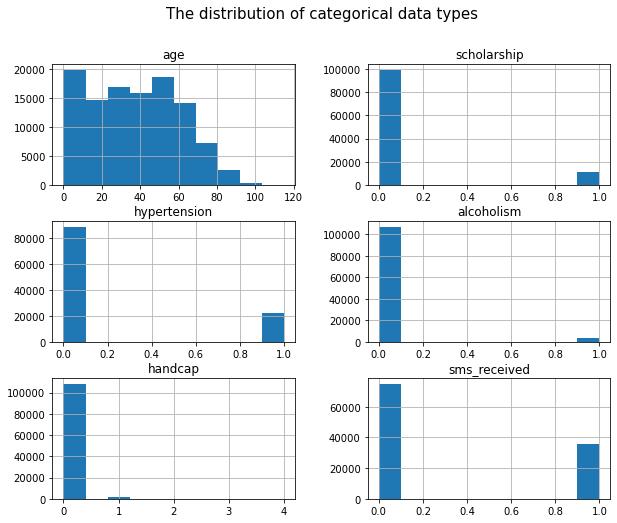

In [15]:
#Plotting an overview of the categorical data types
df_show.hist(figsize=(10,8));
plt.suptitle('The distribution of categorical data types', fontsize=15);

> Brief overview of the whole dataset

<a id='eda'></a>

## Exploratory Data Analysis

### Questions 1 How many patients show up?

In [16]:
#Counting how mant patients showed up or not
df_show['show_value'].value_counts()

show_up    88207
no_show    22319
Name: show_value, dtype: int64

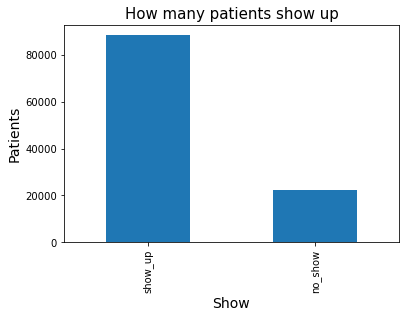

In [17]:
#Plotting bar chart to visualize how many people show up 
df_show['show_value'].value_counts().plot(kind='bar') ;
plt.title('How many patients show up', fontsize=15);
plt.xlabel('Show',fontsize=14);
plt.ylabel('Patients',fontsize=14);

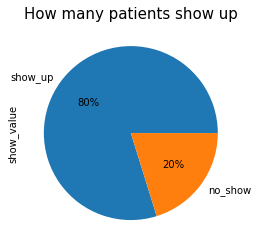

In [18]:
#Plotting pie chart visualize how many people show up 
df_show['show_value'].value_counts().plot(kind='pie', autopct='%1.0f%%') ;
plt.title('How many patients show up', fontsize=15);

### Answer: The above chart shows that the majority of patients do **show** up to their appointments.


### Question 2 What is the age range of patients who show up?

In [19]:
#Grouping age
bins = [0,12,18,25,60,115]
labels = ['Children','Teenegers','Youth','Adult','Elders']

#Creating additional column for age_range
df_show['age_range'] = pd.cut(df_show['age'],bins=bins, labels = labels, right=False)
#Evaluating the output
df_show.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,show_value,age_range
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,Yes,0,0,0,show_up,Elders
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,Yes,0,0,0,show_up,Adult


In [20]:
#Creating a new variable age_group to hold range of different groups
age_group=df_show.groupby('age_range')['show_value'].value_counts().unstack()
age_group

show_value,no_show,show_up
age_range,,
Children,4035,15909
Teenegers,1962,5473
Youth,2469,7419
Adult,10611,41475
Elders,3239,17929


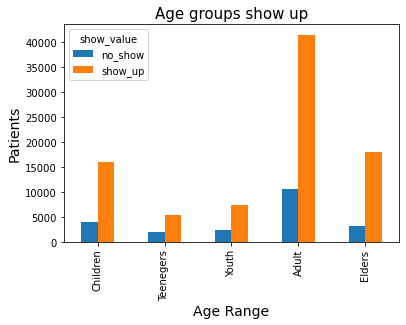

In [21]:
#Plotting how different people of same age group show up
age_group.plot(kind='bar');
plt.title('Age groups show up', fontsize=15);
plt.xlabel('Age Range',fontsize=14);
plt.ylabel('Patients',fontsize=14);

### Answer: The above chart shows that most patients who show up are between 25 to 60 years of age.

## Question 3 Does gender affect patients show up?

In [22]:
#Counting gender 
df_show['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [23]:
#Grouping gender by show and no show
gender_group=df_show.groupby('gender')['show_value'].value_counts().unstack()
gender_group

show_value,no_show,show_up
gender,,
F,14594,57245
M,7725,30962


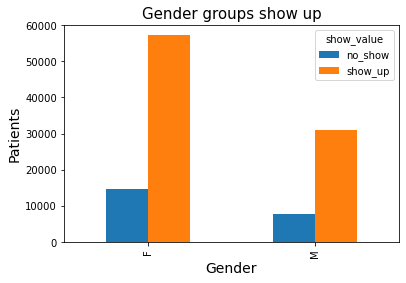

In [24]:
# Visualizing group of gender that show up more
gender_group.plot(kind='bar');
plt.title('Gender groups show up', fontsize=15);
plt.xlabel('Gender',fontsize=14);
plt.ylabel('Patients',fontsize=14);

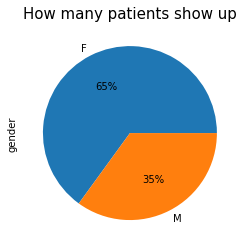

In [25]:
#Visualizing gender percentage of patients who show up
df_show['gender'].value_counts().plot(kind='pie', autopct='%1.0f%%') ;
plt.title('How many patients show up', fontsize=15);

### Answer: At overall, female tend to show up at their appoitment than the males, since the highest portion of the patients were female.

## Question 4 Is having diabetes a factor for showing up?

In [26]:
#Counting patients who have diabetes 
df_show['diabetes'].value_counts()

Yes    102583
No       7943
Name: diabetes, dtype: int64

In [27]:
#Grouping patients by diabetes and show up
diabetes_group=df_show.groupby('diabetes')['show_value'].value_counts().unstack()
diabetes_group

show_value,no_show,show_up
diabetes,,
No,1430,6513
Yes,20889,81694


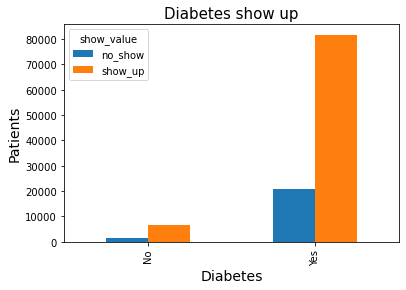

In [28]:
#Visualizing patients with diabetes who show up 
diabetes_group.plot(kind='bar');
plt.title('Diabetes show up', fontsize=15);
plt.xlabel('Diabetes',fontsize=14);
plt.ylabel('Patients',fontsize=14);

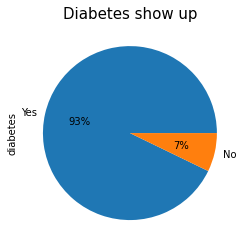

In [29]:
#Visualizing percentage of patients with diabetes who show up
df_show['diabetes'].value_counts().plot(kind='pie', autopct='%1.0f%%') ;
plt.title('Diabetes show up', fontsize=15);

### Answer: Having diabetes affect showing up to the appointment because of the majority of patients who show up have diabetes 

<a id='conclusions'></a>
## Conclusions

> The current project was conducted using a dataset from the Brasilian medical data, with 110526 observations without any missing values and duplicated. The variable of interest was no show at hospital for the appoitment, and independent variables were patients's age, gender, and having diabetes.

> In data exploration, it was found that 80% of the patients showed up at hospital for their appoitment, while 20% did not. In majority, the highest percentage were adult and smallest were teenegers. Moreover, female patients cover 65% and rest were male. Also, largest portion of the patients did not have diabetes, as only 7% of them were having diabetes.

> The findings showed that, in age categories as people get older, they tend to show up on their appoitment than when they were young one and also elderly patients show up at a lower rate. Female patients attend their medical appoitment more than male patients. People who have diabetes tend to show up at hospital at a high level compared to people who do not have diabetes.

> In conclusion, age group, gender, and having diabetes affect the distribution of showing up at hospital for the appoitment.